In [4]:
# importing important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
# reading the dataset
terrorism_df=pd.read_csv('/content/drive/MyDrive/Copy of Global Terrorism Data.csv', encoding='latin1')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


## Basic Data lookup

In [7]:
# checking the dimensionality of the data
terrorism_df.shape

(181691, 135)

## Data prepration (Missing value treatment, removing unwanted columns, selection of features)

In [8]:
# getting the missing values 
miss = (terrorism_df.isnull().sum() / terrorism_df.shape[0]).sort_values(ascending = False)

In [9]:
# getting all the feature names which are missing more than 80%
miss[miss > 0.80].shape[0] / len(terrorism_df.columns)

0.5037037037037037

In [10]:
# dropping all the features with above 80% missing values
terrorism_df = terrorism_df.drop(miss[miss > 0.80].index, axis = 1)

In [11]:
# rechecking the shape of data
terrorism_df.shape

(181691, 67)

In [12]:
# renaming the data columns according to there actual behaviour and use
terrorism_df=terrorism_df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','region_txt':'Region',
                             'provstate':'State','city':'City','attacktype1_txt':'Attack_type','targtype1_txt':'Target_type',
                             'targsubtype1_txt':'Target_subtype','gname':'Gang_name','weaptype1_txt':'Weapon_type'})

In [13]:
# feature selection for study
# selecting only those columns which are required for further EDA
terrorism_df=terrorism_df[['Year','Month','Day','Country','Region','State',
                           'City','Attack_type','Target_type','Target_subtype','Gang_name','Weapon_type']]

In [14]:
# missing value treatment and cleaning the data
terrorism_df['Target_subtype'] = terrorism_df['Target_subtype'].fillna('others')
terrorism_df['State']=terrorism_df['State'].fillna('Unknown')
terrorism_df['City']=terrorism_df['City'].fillna('Unknown')

# replacing the odd values with Vehicle
terrorism_df.replace( {"Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)": "Vehicle"},inplace = True)

In [15]:
# rechecking the null values
terrorism_df.isnull().sum()

Year              0
Month             0
Day               0
Country           0
Region            0
State             0
City              0
Attack_type       0
Target_type       0
Target_subtype    0
Gang_name         0
Weapon_type       0
dtype: int64

In [42]:
terrorism_df['Country'].unique()

array(['Dominican Republic', 'Mexico', 'Philippines', 'Greece', 'Japan',
       'United States', 'Uruguay', 'Italy', 'East Germany (GDR)',
       'Ethiopia', 'Guatemala', 'Venezuela', 'West Germany (FRG)',
       'Switzerland', 'Jordan', 'Spain', 'Brazil', 'Egypt', 'Argentina',
       'Lebanon', 'Ireland', 'Turkey', 'Paraguay', 'Iran',
       'United Kingdom', 'Colombia', 'Bolivia', 'Nicaragua',
       'Netherlands', 'Belgium', 'Canada', 'Australia', 'Pakistan',
       'Zambia', 'Sweden', 'Costa Rica', 'South Yemen', 'Cambodia',
       'Israel', 'Poland', 'Taiwan', 'Panama', 'Kuwait',
       'West Bank and Gaza Strip', 'Austria', 'Czechoslovakia', 'India',
       'France', 'South Vietnam', 'Brunei', 'Zaire',
       "People's Republic of the Congo", 'Portugal', 'Algeria',
       'El Salvador', 'Thailand', 'Haiti', 'Sudan', 'Morocco', 'Cyprus',
       'Myanmar', 'Afghanistan', 'Peru', 'Chile', 'Honduras',
       'Yugoslavia', 'Ecuador', 'New Zealand', 'Malaysia', 'Singapore',
       'Bot

In [40]:
terrorism_df['Year'].min(), terrorism_df['Year'].max(), terrorism_df['Year'].unique().shape

(1970, 2017, (47,))

## Data analysis

In [16]:
Total_countries=terrorism_df['Country'].nunique()
print("Total %d countries were noted in the data"%Total_countries)

Total 205 countries were noted in the data


In [17]:
print("Total number of regions available in data: \n", terrorism_df['Region'].unique())

Total number of regions available in data: 
 ['Central America & Caribbean' 'North America' 'Southeast Asia'
 'Western Europe' 'East Asia' 'South America' 'Eastern Europe'
 'Sub-Saharan Africa' 'Middle East & North Africa' 'Australasia & Oceania'
 'South Asia' 'Central Asia']


In [18]:
print(terrorism_df['Attack_type'].unique())

['Assassination' 'Hostage Taking (Kidnapping)' 'Bombing/Explosion'
 'Facility/Infrastructure Attack' 'Armed Assault' 'Hijacking' 'Unknown'
 'Unarmed Assault' 'Hostage Taking (Barricade Incident)']


In [19]:
print(terrorism_df['Target_type'].unique())

['Private Citizens & Property' 'Government (Diplomatic)'
 'Journalists & Media' 'Police' 'Utilities' 'Military'
 'Government (General)' 'Airports & Aircraft' 'Business'
 'Educational Institution' 'Violent Political Party'
 'Religious Figures/Institutions' 'Unknown' 'Transportation' 'Tourists'
 'NGO' 'Telecommunication' 'Food or Water Supply'
 'Terrorists/Non-State Militia' 'Other' 'Maritime' 'Abortion Related']


In [20]:
print(terrorism_df['Gang_name'].unique().shape)

(3537,)


In [21]:
print(terrorism_df['Weapon_type'].unique())

['Unknown' 'Explosives' 'Incendiary' 'Firearms' 'Chemical' 'Melee'
 'Sabotage Equipment' 'Vehicle' 'Fake Weapons' 'Radiological' 'Other'
 'Biological']


In [22]:
# top 10 most affected countries by terror attack
terrorism_df['Country'].value_counts().head(10)

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Name: Country, dtype: int64

In [23]:
# top 10 most affected Regions by terror attack
terrorism_df['Region'].value_counts().head(10)

Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Name: Region, dtype: int64

In [24]:
# top 10 most affected State by terror attack
terrorism_df['State'].value_counts().head(11).drop('Unknown')

Baghdad               7645
Northern Ireland      4498
Balochistan           3710
Saladin               3411
Al Anbar              3299
Nineveh               3241
Sindh                 3206
Khyber Pakhtunkhwa    3084
Diyala                3041
Lima                  2615
Name: State, dtype: int64

In [25]:
# top 10 most affected State by terror attack
terrorism_df['City'].value_counts().head(11).drop('Unknown')

Baghdad         7589
Karachi         2652
Lima            2359
Mosul           2265
Belfast         2171
Santiago        1621
Mogadishu       1581
San Salvador    1558
Istanbul        1048
Athens          1019
Name: City, dtype: int64

In [26]:
# top 10 most affected Attack type by terror attack
terrorism_df['Attack_type'].value_counts().head(11).drop('Unknown')

Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: Attack_type, dtype: int64

In [27]:
# top 10 most affected target type by terror attack
terrorism_df['Target_type'].value_counts().head(10).drop('Unknown')

Private Citizens & Property       43511
Military                          27984
Police                            24506
Government (General)              21283
Business                          20669
Transportation                     6799
Utilities                          6023
Religious Figures/Institutions     4440
Educational Institution            4322
Name: Target_type, dtype: int64

In [28]:
# top 10 gangs
terrorism_df['Gang_name'].value_counts().head(10)

Unknown                                             82782
Taliban                                              7478
Islamic State of Iraq and the Levant (ISIL)          5613
Shining Path (SL)                                    4555
Farabundo Marti National Liberation Front (FMLN)     3351
Al-Shabaab                                           3288
New People's Army (NPA)                              2772
Irish Republican Army (IRA)                          2671
Revolutionary Armed Forces of Colombia (FARC)        2487
Boko Haram                                           2418
Name: Gang_name, dtype: int64

In [29]:
# top 5 weapon types used in terror attacks
terrorism_df['Weapon_type'].value_counts().head(5)

Explosives    92426
Firearms      58524
Unknown       15157
Incendiary    11135
Melee          3655
Name: Weapon_type, dtype: int64

### Visualization

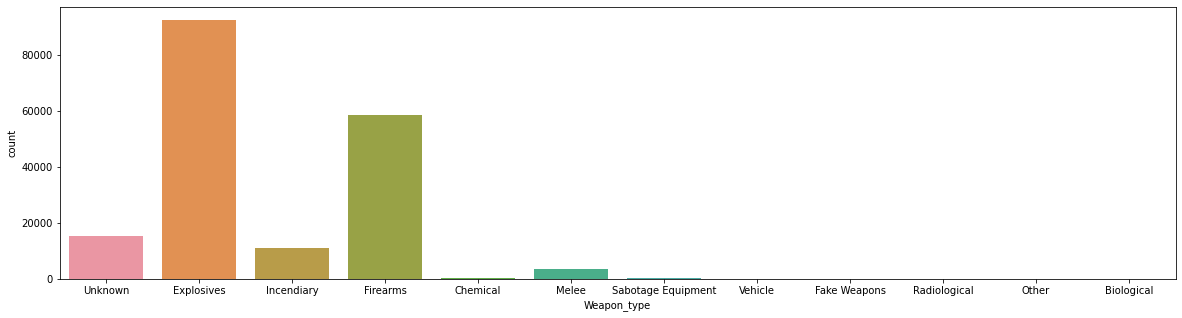

In [30]:
# weapons used in terror attacks
# From following fig we can see that most used weapon type for terror attach are Explosives.
# As we can also conclude that Biological weapons are least used type when it comes to terror attack.
plt.figure(figsize=(20,5));
sns.countplot(x=terrorism_df.Weapon_type);

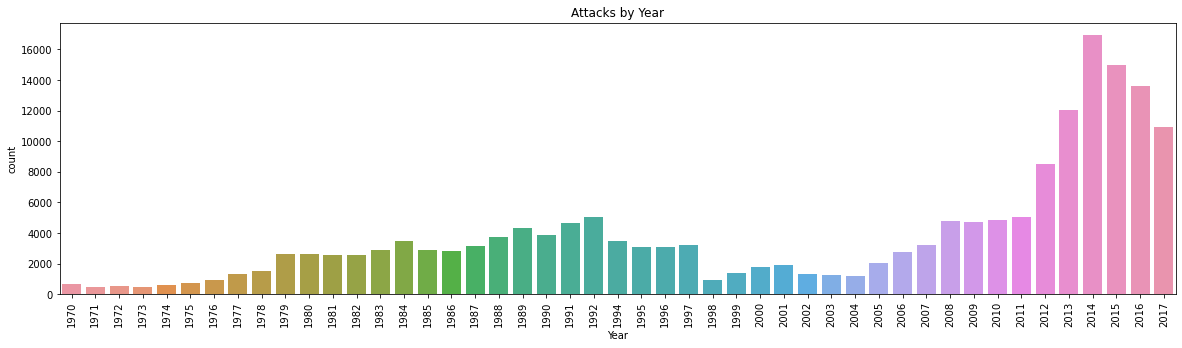

In [31]:
# terror attacks years wise
# most attack happened in 2014 as we can see in the graph
# if we see the trend, then from 1970 to 1992 attacks were linearly increasing and they dropped till 2004 and again increased drastically and linearly.

plt.figure(figsize=(20,5));
plt.xticks(rotation = 90)
plt.title('Attacks by Year')
sns.countplot(x=terrorism_df.Year);

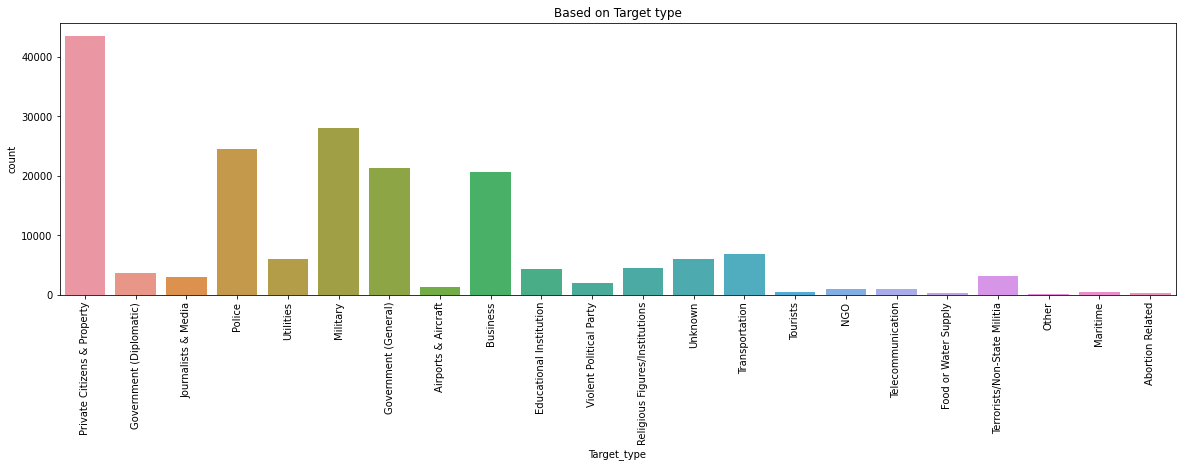

In [32]:
# As we can clearly see that private citizens and properties are mostly targeted by terrorist, may be because these are most easily accessable places than the rest.
# Also police and military are the second most targeted types of terrorists.

plt.figure(figsize=(20,5));
plt.rcParams.update({'font.size':10});
plt.xticks(rotation = 90)
plt.title('Based on Target type')
sns.countplot(x=terrorism_df.Target_type);

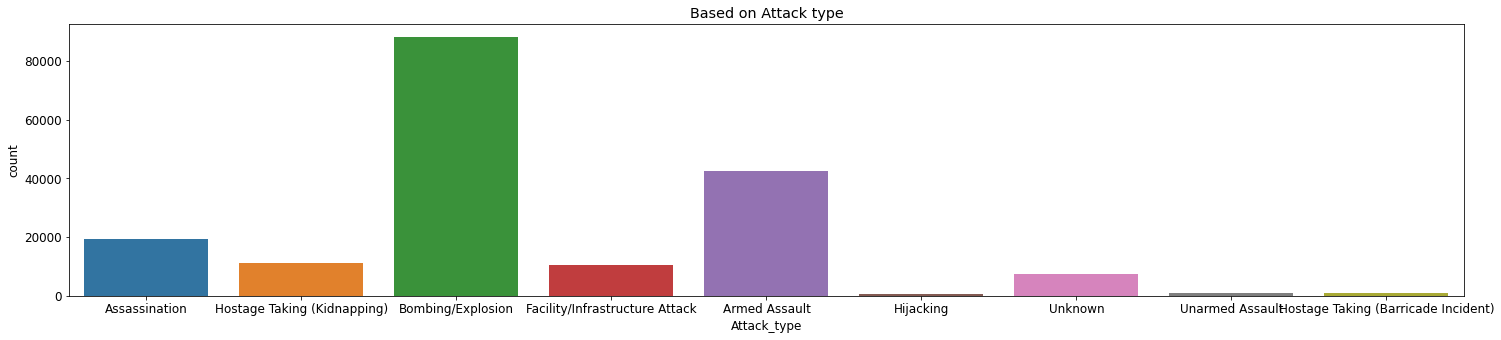

In [33]:
# As we can see most attack types used by terrorists are armed assaults and explosives.
# Also, we can see some attack types unarmed also.
plt.figure(figsize=(25,5));
plt.rcParams.update({'font.size':12});
plt.xticks(rotation = 0)
plt.title('Based on Attack type')
sns.countplot(x=terrorism_df.Attack_type);

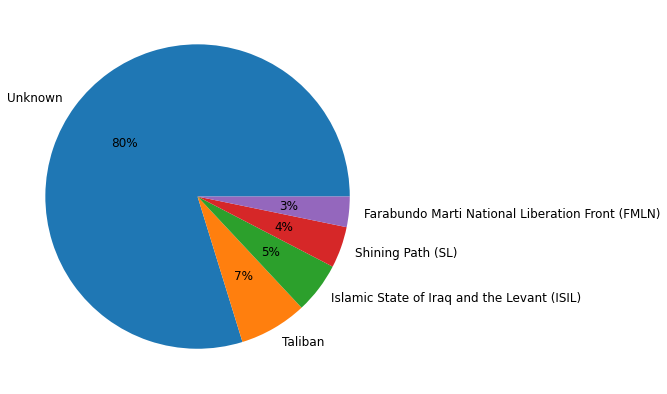

In [34]:
# top 5 gang names 
# As seen in figure below we can see that around 80% attacks done by unknown terrorist groups
# and also we can see that second most attacks done by taliban gang.

plt.figure(figsize=(10, 7))
labels = terrorism_df['Gang_name'].value_counts().head(5).index

plt.pie(terrorism_df['Gang_name'].value_counts().head(5),
        labels = labels, autopct='%1.0f%%')

plt.show()

In [35]:
# top 10 countries with most terrorist attacks

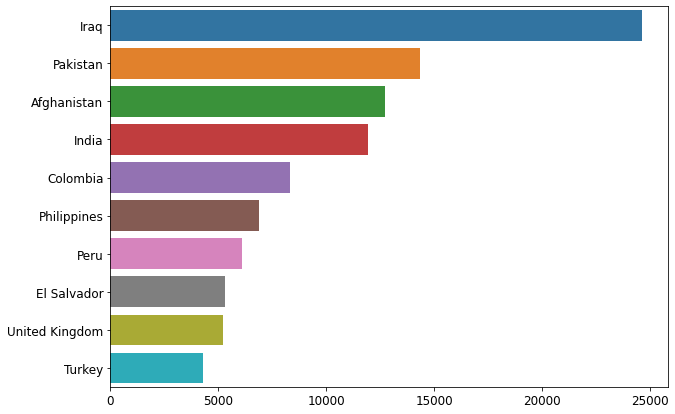

In [36]:
to_10_countries = terrorism_df['Country'].value_counts().head(10)
plt.figure(figsize=(10, 7))
sns.barplot(x = to_10_countries.values, y = to_10_countries.index)
plt.show()

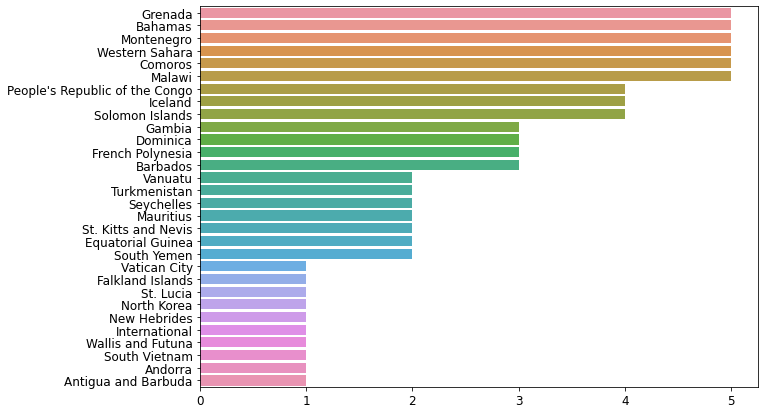

In [37]:
# top 30 countries with comparitively least terrorist attacks
least_10_countries = terrorism_df['Country'].value_counts().tail(30)
plt.figure(figsize=(10, 7))
sns.barplot(x = least_10_countries.values, y = least_10_countries.index)
plt.show()

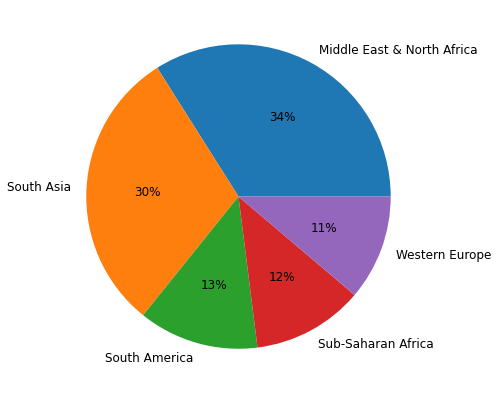

In [38]:
# Region wise attacks distribution
plt.figure(figsize=(10, 7))
labels = terrorism_df['Region'].value_counts().head(5).index

plt.pie(terrorism_df['Region'].value_counts().head(5),
        labels = labels, autopct='%1.0f%%')

plt.show()